In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Best datset_model perspective_AUC/Data/lucene-3.1.csv')
data = data.drop('File', axis=1)
X = data.iloc[:,0:]  #independent columns
y = data.iloc[:,-1]    #target column i.e Realbug
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

               Specs         Score
48     CountPath_Max  6.814585e+10
49    CountPath_Mean  7.317042e+09
58         Del_lines  5.616917e+05
57       Added_lines  2.064953e+05
2          CountLine  1.895193e+05
31         CountStmt  1.124913e+05
27     CountLineCode  1.118585e+05
23  CountLineCodeExe  9.716616e+04
33    CountSemicolon  9.117785e+04
28      CountStmtExe  9.090058e+04


In [2]:
## Load Data and preparing datasets

# Import for Load Data
from os import listdir
from os.path import isfile, join
import pandas as pd

# Import for Split Data into Training and Testing Samples
from sklearn.model_selection import train_test_split

train_dataset = pd.read_csv(('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Best datset_model perspective_AUC/Data/lucene-2.9.0.csv'), index_col = 'File')
test_dataset = pd.read_csv(('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Best datset_model perspective_AUC/Data/lucene-3.1.csv'), index_col = 'File')

outcome = 'RealBug'
features = ['CountPath_Max', 'CountPath_Mean', 'Del_lines', 'Added_lines', 'CountLine', 'CountStmt', 'CountLineCode']
# commits - # of commits that modify the file of interest
# Added lines - # of added lines of code
# Count class coupled - # of classes that interact or couple with the class of interest
# LOC - # of lines of code
# RatioCommentToCode - The ratio of lines of comments to lines of code

# process outcome to 0 and 1
train_dataset[outcome] = pd.Categorical(train_dataset[outcome])
train_dataset[outcome] = train_dataset[outcome].cat.codes

test_dataset[outcome] = pd.Categorical(test_dataset[outcome])
test_dataset[outcome] = test_dataset[outcome].cat.codes

X_train = train_dataset.loc[:, features]
X_test = test_dataset.loc[:, features]

y_train = train_dataset.loc[:, outcome]
y_test = test_dataset.loc[:, outcome]

class_labels = ['Clean', 'Defective']

X_train.columns = features
X_test.columns = features
training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

In [3]:
test_dataset

,CountDeclMethodPrivate,AvgLineCode,CountLine,MaxCyclomatic,CountDeclMethodDefault,AvgEssential,CountDeclClassVariable,SumCyclomaticStrict,AvgCyclomatic,AvgLine,...,OWN_LINE,OWN_COMMIT,MINOR_COMMIT,MINOR_LINE,MAJOR_COMMIT,MAJOR_LINE,HeuBug,HeuBugCount,RealBug,RealBugCount
File,,,,,,,,,,,,,,,,,,,,,
lucene/backwards/src/test/org/apache/lucene/analysis/BaseTokenStreamTestCase.java,0,4,170,12,0,1,0,34,2,5,...,1.000000,0.000000,0,1,0,0,False,0,0,0
lucene/backwards/src/test/org/apache/lucene/analysis/TestAnalyzers.java,0,9,163,3,1,1,0,12,1,10,...,0.987805,0.000000,0,1,0,1,False,0,0,0
lucene/backwards/src/test/org/apache/lucene/analysis/TestASCIIFoldingFilter.java,0,528,1906,5,1,1,0,7,2,608,...,1.000000,0.000000,0,1,0,0,False,0,0,0
lucene/backwards/src/test/org/apache/lucene/analysis/TestCachingTokenFilter.java,1,21,110,2,0,1,0,5,2,26,...,1.000000,0.000000,0,1,0,0,False,0,0,0
lucene/backwards/src/test/org/apache/lucene/analysis/TestCharArraySet.java,0,21,180,10,0,1,1,17,3,25,...,1.000000,0.000000,0,1,0,0,False,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
solr/src/webapp/src/org/apache/solr/servlet/SolrDispatchFilter.java,2,21,414,25,0,2,1,59,5,29,...,0.355072,0.428571,0,5,4,4,False,0,0,0
solr/src/webapp/src/org/apache/solr/servlet/SolrRequestParsers.java,0,11,413,13,1,1,4,48,3,15,...,0.590799,0.000000,0,3,0,2,False,0,0,0
solr/src/webapp/src/org/apache/solr/servlet/SolrServlet.java,0,17,150,11,1,1,1,18,4,21,...,0.489933,0.750000,0,4,2,3,False,0,0,0


In [4]:
from sklearn.ensemble import RandomForestClassifier
our_rf_model = RandomForestClassifier(random_state=0)
our_rf_model.fit(X_train, y_train)  

RandomForestClassifier(random_state=0)

In [5]:
y_test.value_counts()

0    2699
1     107
Name: RealBug, dtype: int64

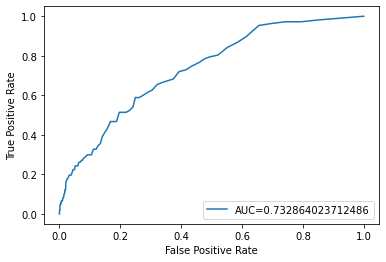

In [6]:
from sklearn import metrics
from matplotlib import pyplot as plt
y_pred_proba = our_rf_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## LIME

In [7]:
# Import for LIME
import lime
import lime.lime_tabular

file_to_be_explained = 'lucene/contrib/queryparser/src/java/org/apache/lucene/queryParser/standard/parser/StandardSyntaxParser.java'

print(f'Explaining {file_to_be_explained} with LIME')

Explaining lucene/contrib/queryparser/src/java/org/apache/lucene/queryParser/standard/parser/StandardSyntaxParser.java with LIME


In [8]:
# LIME Step 1 - Construct an explainer
our_lime_explainer = lime.lime_tabular.LimeTabularExplainer(
                            training_data = X_train.values,  
                            mode = 'classification',
                            training_labels = y_train,
                            feature_names = features,
                            class_names = class_labels,
                            discretize_continuous = True)
                            
# LIME Step 2 - Use the constructed explainer with the predict function 
# of your predictive model to explain any instance
lime_local_explanation_of_an_instance = our_lime_explainer.explain_instance(
                           # X_test[0],
                          # data_row = X_test.loc['FileName.py', : ], 
                            data_row = X_test.loc[file_to_be_explained, : ],
                            predict_fn = our_rf_model.predict_proba, 
                            num_features = 7,
                            top_labels = 1)

#explainer = lime_tabular.LimeTabularExplainer(X_train, mode = "regression", feature_names = boston_housing.feature_names)
#explanation = explainer.explain_instance(X_test[0], model.predict, num_features = len(boston_housing.feature_names))
                            
# Please use the code below to visualise the generated LIME explanation.
lime_local_explanation_of_an_instance.show_in_notebook()

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## SHAP

In [9]:
# Import libraries for SHAP
import subprocess
import sys
import importlib
import numpy
import shap

file_to_be_explained = 'lucene/contrib/queryparser/src/java/org/apache/lucene/queryParser/standard/parser/StandardSyntaxParser.java'
file_to_be_explained_idx = list(X_test.index).index(file_to_be_explained)

In [10]:
# explainer = shap.Explainer(our_rf_model, numpy.ascontiguousarray(X_train))
# shap_values = explainer(numpy.ascontiguousarray(X_test))

explainer = shap.Explainer(our_rf_model)
shap_values = explainer(X_test)

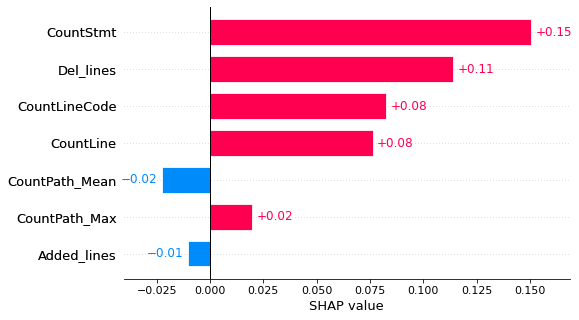

In [11]:
import matplotlib.pyplot as plt
shap.plots.bar(shap_values[file_to_be_explained_idx, :, 1], show=True)

## BreakDown

In [12]:
## Load Data and preparing datasets

# Import for Load Data
from os import listdir
from os.path import isfile, join
import pandas as pd

# Import for Split Data into Training and Testing Samples
from sklearn.model_selection import train_test_split

train_dataset = pd.read_csv(('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Best datset_model perspective_AUC/Data/lucene-2.9.0.csv'), index_col = 'File')
test_dataset = pd.read_csv(('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Best datset_model perspective_AUC/Data/lucene-3.1.csv'), index_col = 'File')

outcome = 'RealBug'
features = ['CountPath_Max', 'CountPath_Mean', 'Del_lines', 'Added_lines', 'CountLine', 'CountStmt', 'CountLineCode']
# commits - # of commits that modify the file of interest
# Added lines - # of added lines of code
# Count class coupled - # of classes that interact or couple with the class of interest
# LOC - # of lines of code
# RatioCommentToCode - The ratio of lines of comments to lines of code

# process outcome to 0 and 1
train_dataset[outcome] = pd.Categorical(train_dataset[outcome])
train_dataset[outcome] = train_dataset[outcome].cat.codes

test_dataset[outcome] = pd.Categorical(test_dataset[outcome])
test_dataset[outcome] = test_dataset[outcome].cat.codes

X_train = train_dataset.loc[:, features]
X_test = test_dataset.loc[:, features]

y_train = train_dataset.loc[:, outcome]
y_test = test_dataset.loc[:, outcome]

class_labels = ['Clean', 'Defective']

X_train.columns = features
X_test.columns = features
training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

In [13]:
from sklearn.ensemble import RandomForestClassifier
our_rf_model = RandomForestClassifier(random_state=0)
our_rf_model.fit(X_train, y_train) 

RandomForestClassifier(random_state=0)

In [14]:
#necessary imports
from pyBreakDown.explainer import Explainer
from pyBreakDown.explanation import Explanation
#make explainer object
exp = Explainer(clf=our_rf_model, data= X_train, colnames=features)

In [15]:
#make explanation object that contains all information

explanation = exp.explain(observation=X_train.iloc[0,:].values,direction="up",useIntercept=True)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

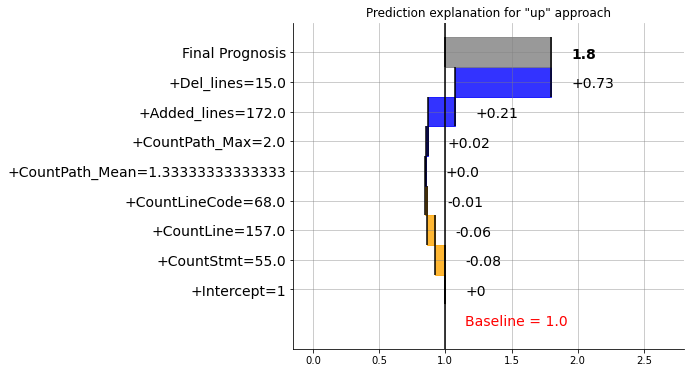

In [16]:
explanation.visualize()

## PyExplainer

In [17]:
## Load Data and preparing datasets

# Import for Load Data
from os import listdir
from os.path import isfile, join
import pandas as pd

# Import for Split Data into Training and Testing Samples
from sklearn.model_selection import train_test_split

train_dataset = pd.read_csv(('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Best datset_model perspective_AUC/Data/lucene-2.9.0.csv'), index_col = 'File')
test_dataset = pd.read_csv(('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Best datset_model perspective_AUC/Data/lucene-3.1.csv'), index_col = 'File')

outcome = 'RealBug'
features = ['CountPath_Max', 'CountPath_Mean', 'Del_lines', 'Added_lines', 'CountLine', 'CountStmt', 'CountLineCode']
# OWN_COMMIT - # code ownership
# Added lines - # of added lines of code
# Count class coupled - # of classes that interact or couple with the class of interest
# RatioCommentToCode - The ratio of lines of comments to lines of code

# process outcome to 0 and 1
train_dataset[outcome] = pd.Categorical(train_dataset[outcome])
train_dataset[outcome] = train_dataset[outcome].cat.codes

test_dataset[outcome] = pd.Categorical(test_dataset[outcome])
test_dataset[outcome] = test_dataset[outcome].cat.codes

X_train = train_dataset.loc[:, features]
X_test = test_dataset.loc[:, features]

y_train = train_dataset.loc[:, outcome]
y_test = test_dataset.loc[:, outcome]


class_labels = ['Clean', 'Defective']

X_train.columns = features
X_test.columns = features
training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)  

RandomForestClassifier(random_state=0)

In [19]:
from pyexplainer.pyexplainer_pyexplainer import PyExplainer
file_to_be_explained = 'lucene/contrib/queryparser/src/java/org/apache/lucene/queryParser/standard/parser/StandardSyntaxParser.java'
import numpy as np
np.random.seed(0)

pyexp = PyExplainer(X_train = X_train,
                           y_train = y_train,
                           indep = X_train.columns,
                           dep = outcome,
                           top_k_rules=5,
                           blackbox_model = rf_model)

# PyExplainer Step 2 - Generate the rule-based explanation of an instance to be explained
exp_obj = pyexp.explain(X_explain = X_test.loc[file_to_be_explained,:].to_frame().transpose(),
                        y_explain = pd.Series(bool(y_test.loc[file_to_be_explained]), 
                                                      index = [file_to_be_explained],
                                                      name = outcome),
                        search_function = 'crossoverinterpolation',
                        max_iter=1000,
                        max_rules=20,
                        random_state=0,
                        reuse_local_model=True)

# Print rule 
exp_obj['top_k_positive_rules'][:1]

# Please use the code below to visualise the generated PyExplainer explanation (What-If interactive visualisation).
pyexp.visualise(exp_obj, title="Why this file is predicted as defect-introducing?")


set top_k_rules failed, top_k_rules should be int in range 1 - 15 (both included)
PyExplainer can not find rules to avoid!
This could lead to blank explanation UI!
Please check whether the global model is properly trained with sufficient training data.


Output(layout=Layout(border='3px solid black'))

FloatSlider(value=8.0, continuous_update=False, description='#1 The value of Del_lines is more than 8.0', layo…

FloatSlider(value=116.03, continuous_update=False, description='#2 The value of CountPath_Mean is less than 11…

## PDP

In [21]:
## Load Data and preparing datasets

# Import for Load Data
from os import listdir
from os.path import isfile, join
import pandas as pd

# Import for Split Data into Training and Testing Samples
from sklearn.model_selection import train_test_split

train_dataset = pd.read_csv(('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Best datset_model perspective_AUC/Data/lucene-2.9.0.csv'), index_col = 'File')
test_dataset = pd.read_csv(('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Best datset_model perspective_AUC/Data/lucene-3.1.csv'), index_col = 'File')


#outcome = 'RealBug'
#features = ['MAJOR_COMMIT', 'ADEV', 'COMM', 'OWN_COMMIT', 'CountClassCoupled', 'HeuBugCount', 'DDEV', 'HeuBug', 'HeuBugCount']
outcome = 'RealBug'
features = ['CountPath_Max', 'CountPath_Mean', 'Del_lines', 'Added_lines', 'CountLine', 'CountStmt', 'CountLineCode']
# commits - # of commits that modify the file of interest
# Added lines - # of added lines of code
# Count class coupled - # of classes that interact or couple with the class of interest
# LOC - # of lines of code
# RatioCommentToCode - The ratio of lines of comments to lines of code

# process outcome to 0 and 1
train_dataset[outcome] = pd.Categorical(train_dataset[outcome])
train_dataset[outcome] = train_dataset[outcome].cat.codes

test_dataset[outcome] = pd.Categorical(test_dataset[outcome])
test_dataset[outcome] = test_dataset[outcome].cat.codes

X_train = train_dataset.loc[:, features]
X_test = test_dataset.loc[:, features]

y_train = train_dataset.loc[:, outcome]
y_test = test_dataset.loc[:, outcome]

class_labels = ['Clean', 'Defective']

X_train.columns = features
X_test.columns = features
training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

In [22]:
from sklearn.ensemble import RandomForestClassifier
our_rf_model = RandomForestClassifier(random_state=0)
our_rf_model.fit(X_train, y_train)  

RandomForestClassifier(random_state=0)

In [23]:
import numpy as np
import pandas as pd
# sklearn version: v1.0.1
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.inspection import (partial_dependence, 
                                PartialDependenceDisplay)
import matplotlib.pyplot as plt
import seaborn as sns


file_to_be_explained = 'lucene/contrib/queryparser/src/java/org/apache/lucene/queryParser/standard/parser/StandardSyntaxParser.java'

print(f'Explaining {file_to_be_explained} with PDP')

Explaining lucene/contrib/queryparser/src/java/org/apache/lucene/queryParser/standard/parser/StandardSyntaxParser.java with PDP


## Average Value of CountPath_Max

In [24]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [0], kind = 'average')

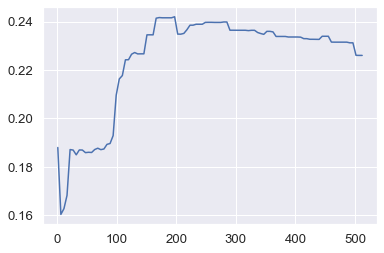

In [25]:
plt.plot(results['values'][0], results['average'][0])

## Average Value of CountPath_Mean

In [26]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [1], kind = 'average')

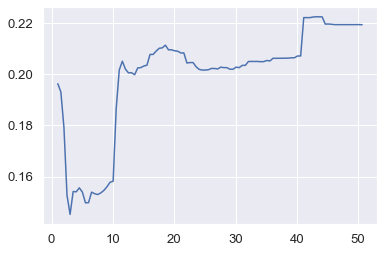

In [27]:
plt.plot(results['values'][0], results['average'][0])

## Average Value of Del_lines

In [28]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [2], kind = 'average')

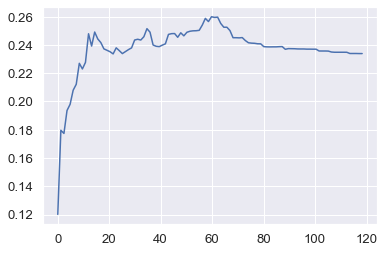

In [29]:
plt.plot(results['values'][0], results['average'][0])

## Average Value of Added_lines

In [30]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [3], kind = 'average')

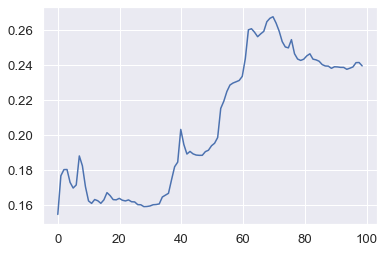

In [31]:
plt.plot(results['values'][0], results['average'][0])

## Average Value of CountLine

In [32]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [4], kind = 'average')

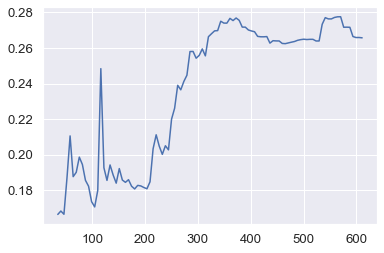

In [33]:
plt.plot(results['values'][0], results['average'][0])

## Average Value of CountStmt

In [34]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [5], kind = 'average')

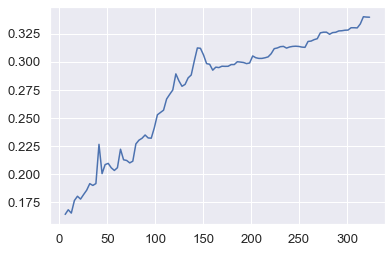

In [35]:
plt.plot(results['values'][0], results['average'][0])

## Average Value of CountLineCode

In [36]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [6], kind = 'average')

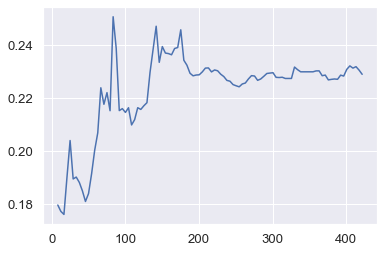

In [37]:
plt.plot(results['values'][0], results['average'][0])

## ICE

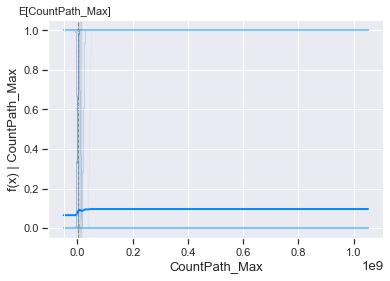

In [38]:
import subprocess
import sys
import importlib
import numpy
import shap

shap.plots.partial_dependence(
    "CountPath_Max", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

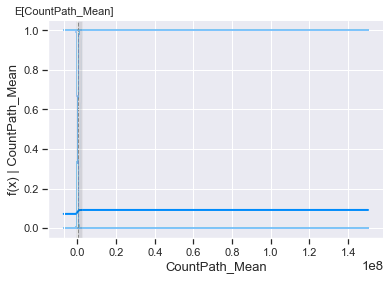

In [39]:
shap.plots.partial_dependence(
    "CountPath_Mean", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

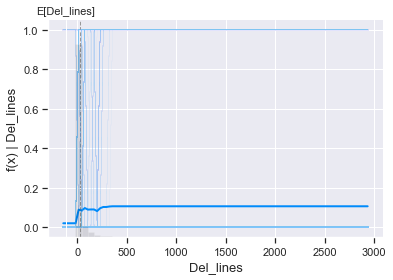

In [40]:
shap.plots.partial_dependence(
    "Del_lines", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

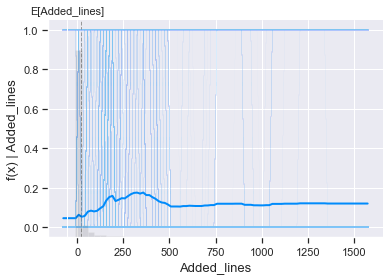

In [41]:
shap.plots.partial_dependence(
    "Added_lines", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

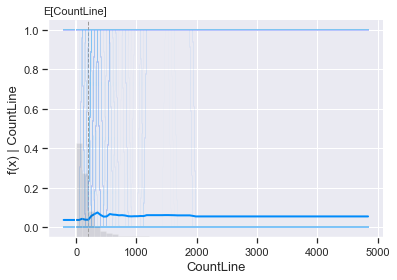

In [42]:
shap.plots.partial_dependence(
    "CountLine", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

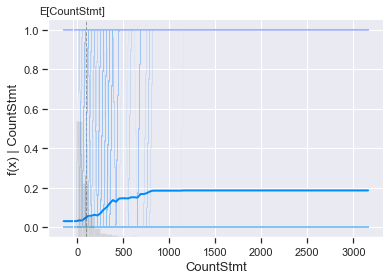

In [43]:
shap.plots.partial_dependence(
    "CountStmt", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

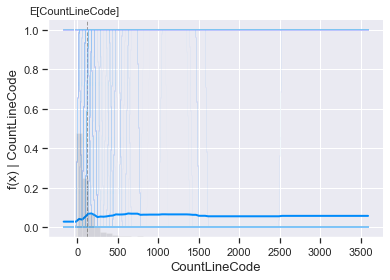

In [44]:
shap.plots.partial_dependence(
    "CountLineCode", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

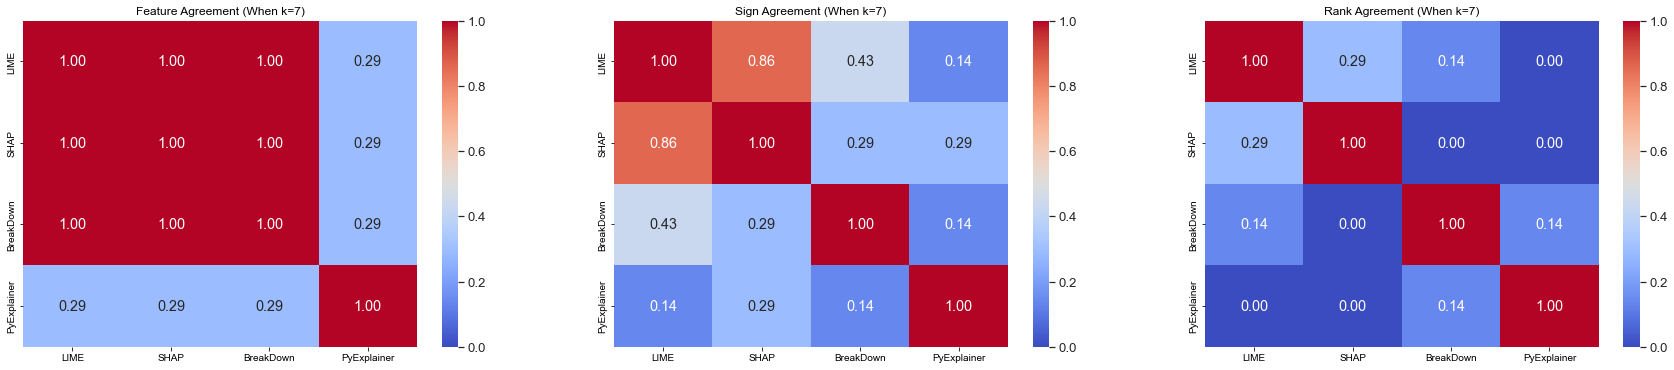

In [20]:
import seaborn as sns
import pandas as pd

data1 = pd.read_csv("/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Buggy file testing/k=7/k7Chi_Feature Agreement.csv", index_col=0)
data2 = pd.read_csv("/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Buggy file testing/k=7/k7Chi_Sign Agreement.csv", index_col=0)
data3 = pd.read_csv("/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Buggy file testing/k=7/k7Chi_Rank Agreement.csv", index_col=0)


fig, ax = plt.subplots(1,3, figsize=(30, 6))


sns.set(font_scale=1.2)
sns.heatmap(data1, cmap="coolwarm", annot=True, fmt=".2f", vmin=0, vmax=1, ax= ax[0])
ax[0].title.set_text("Feature Agreement (When k=7)")

sns.heatmap(data2, cmap="coolwarm", annot=True, fmt=".2f", vmin=0, vmax=1, ax= ax[1])
ax[1].title.set_text("Sign Agreement (When k=7)")

sns.heatmap(data3, cmap="coolwarm", annot=True, fmt=".2f", vmin=0, vmax=1, ax= ax[2])
ax[2].title.set_text("Rank Agreement (When k=7)")


plt.show()